In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка и обработка данных

In [76]:
df = pd.read_csv(
    'data/2315676.txt',
    sep='\s+',
    na_values=-9999,
    parse_dates=["DATE"],
    date_format='%Y%m%d',
    index_col="DATE",
    skiprows=[1],
)

df.columns = ['station', 'station_name', 'tavg', 'tmax', 'tmin']
df = df.rename_axis('date')

In [77]:
df.head()

,station,station_name,tavg,tmax,tmin
date,,,,,
1908-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,2.0,-37.0
1908-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,6.0,-26.0
1908-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,7.0,-27.0
1908-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-27.0
1908-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,4.0,-36.0


In [78]:
# Заменяем -9999 на NA
df.replace(-9999, np.nan, inplace=True)

In [79]:
df.head()

,station,station_name,tavg,tmax,tmin
date,,,,,
1908-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,2.0,-37.0
1908-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,6.0,-26.0
1908-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,7.0,-27.0
1908-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-27.0
1908-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,4.0,-36.0


In [80]:
# Высчитываем новую средную температуру и дропаем лишнее
df['new_tavg'] = df.apply(lambda row: (row['tmax'] + row['tmin']) / 2 if pd.isnull(row['tavg']) else row['tavg'], axis=1)
df.dropna(subset=['new_tavg'], inplace=True)

In [81]:
df.head()

,station,station_name,tavg,tmax,tmin,new_tavg
date,,,,,,
1908-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,2.0,-37.0,-17.5
1908-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,6.0,-26.0,-10.0
1908-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,7.0,-27.0,-10.0
1908-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-27.0,-15.0
1908-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,4.0,-36.0,-16.0


# Перевод из фаренгейтов в цельсии

In [82]:
def fahrenheit_to_celsius(fahrenheit):
    return (fahrenheit - 32) / 1.8

df['tavg_celsius'] = df['tavg'].apply(fahrenheit_to_celsius)
df['tmax_celsius'] = df['tmax'].apply(fahrenheit_to_celsius)
df['tmin_celsius'] = df['tmin'].apply(fahrenheit_to_celsius)

In [83]:
df.head()

,station,station_name,tavg,tmax,tmin,new_tavg,tavg_celsius,tmax_celsius,tmin_celsius
date,,,,,,,,,
1908-01-01,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,2.0,-37.0,-17.5,NaN,-16.666667,-38.333333
1908-01-02,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,6.0,-26.0,-10.0,NaN,-14.444444,-32.222222
1908-01-03,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,7.0,-27.0,-10.0,NaN,-13.888889,-32.777778
1908-01-04,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,-3.0,-27.0,-15.0,NaN,-19.444444,-32.777778
1908-01-05,GHCND:FI000007501,SODANKYLA-AWS-FI,NaN,4.0,-36.0,-16.0,NaN,-15.555556,-37.777778


In [84]:
# Разделение на датасеты по временам года
temps_winter = df.loc[(df.index >= "19770101") & (df.index < "19770301")]
temps_spring = df.loc[(df.index >= "19770301") & (df.index < "19770601")]
temps_summer = df.loc[(df.index >= "19770601") & (df.index < "19770901")]
temps_autumn = df.loc[(df.index >= "19770901") & (df.index < "19771201")]

# Средняя температура

In [85]:
mean_temp_winter = round(temps_winter["tavg_celsius"].mean(), 0)
mean_temp_spring = round(temps_spring["tavg_celsius"].mean(), 0)
mean_temp_summer = round(temps_summer["tavg_celsius"].mean(), 0)
mean_temp_autumn = round(temps_autumn["tavg_celsius"].mean(), 0)

print("Средняя температура зимой:", mean_temp_winter)
print("Средняя температура весной:", mean_temp_spring)
print("Средняя температура летом:", mean_temp_summer)
print("Средняя температура осенью:", mean_temp_autumn)

Средняя температура зимой: -14.0
Средняя температура весной: -3.0
Средняя температура летом: 11.0
Средняя температура осенью: -1.0


# Графики

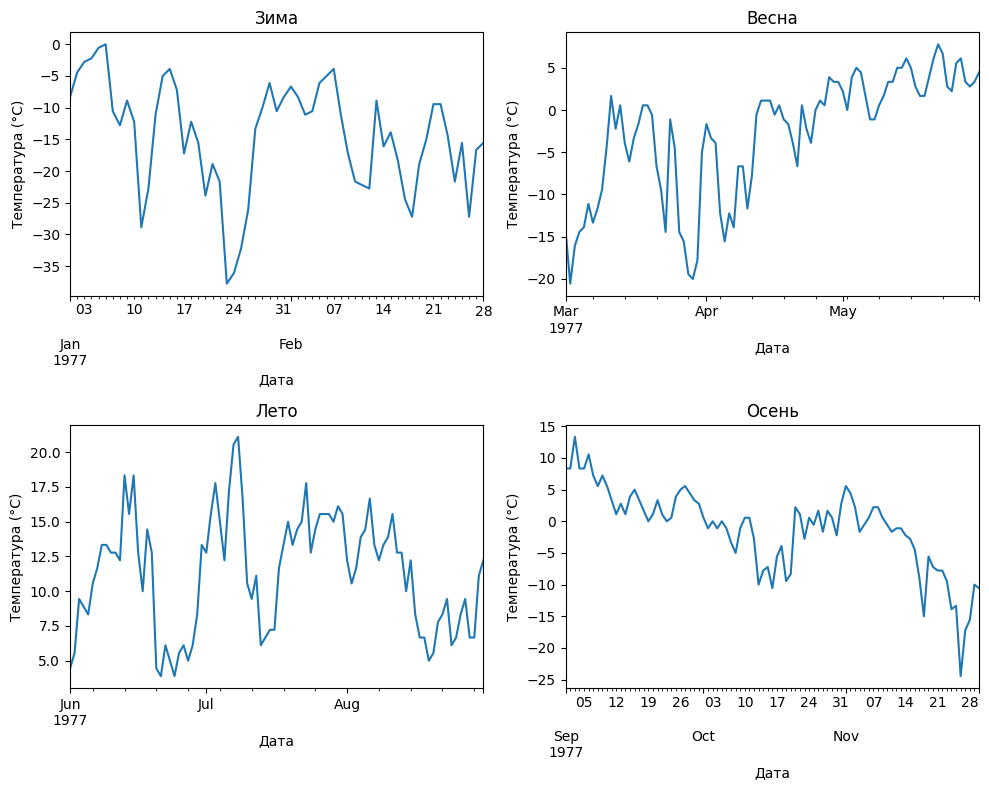

In [86]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Зима
temps_winter['tavg_celsius'].plot(ax=axs[0, 0], title='Зима')
axs[0, 0].set_ylabel('Температура (°C)')
axs[0, 0].set_xlabel('Дата')

# Весна
temps_spring['tavg_celsius'].plot(ax=axs[0, 1], title='Весна')
axs[0, 1].set_ylabel('Температура (°C)')
axs[0, 1].set_xlabel('Дата')

# Лето
temps_summer['tavg_celsius'].plot(ax=axs[1, 0], title='Лето')
axs[1, 0].set_xlabel('Дата')
axs[1, 0].set_ylabel('Температура (°C)')

# Осень
temps_autumn['tavg_celsius'].plot(ax=axs[1, 1], title='Осень')
axs[1, 1].set_xlabel('Дата')
axs[1, 1].set_ylabel('Температура (°C)')

plt.tight_layout()
plt.show()